In [34]:
from urllib.parse import urlencode
from urllib.request import urlopen
from datetime import datetime
import itertools
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def dateToStr(date):
    l = date.split('.')
    l[2]=l[2][2:]
    return ''.join(l)
def getFileName(ticker,period,startDate,endDate):
    return f'{ticker}_{period}_{dateToStr(startDate)}_{dateToStr(endDate)}.txt'

def getData(url, fileName):
    print("Стучимся на Финам по ссылке: "+url)
    txt=urlopen(url).readlines()
    local_file = open(fileName, "w") #задаём файл, в который запишем котировки.
    for line in txt: #записываем свечи строку за строкой. 
        local_file.write(line.strip().decode( "utf8" )+'\n')	
    local_file.close()
    print(f"Готово. Проверьте файл {fileName}")

In [10]:
#каждой акции Финам присвоил цифровой код:
tickers={'ABRD':82460,'AESL':181867,'AFKS':19715,'AFLT':29,
         'AGRO':399716,'AKRN':17564,'ALBK':82616,'ALNU':81882,
         'ALRS':81820,'AMEZ':20702,'APTK':13855,'AQUA':35238,
         'ARMD':19676,'ARSA':19915,'ASSB':16452,'AVAN':82843,
         'AVAZ':39,'AVAZP':40,'BANE':81757,'BANEP':81758,'BGDE':175840,
         'BISV':35242,'BISVP':35243,'BLNG':21078,'BRZL':81901,'BSPB':20066,
         'CBOM':420694,'CHEP':20999,'CHGZ':81933,'CHKZ':21000,'CHMF':16136,
         'CHMK':21001,'CHZN':19960,'CLSB':16712,'CLSBP':16713,'CNTL':21002,
         'CNTLP':81575,'DASB':16825,'DGBZ':17919,'DIOD':35363,'DIXY':18564,
         'DVEC':19724,'DZRD':74744,'DZRDP':74745,'ELTZ':81934,'ENRU':16440,
         'EPLN':451471,'ERCO':81935,'FEES':20509,'FESH':20708,'FORTP':82164,
         'GAZA':81997,'GAZAP':81998,'GAZC':81398,'GAZP':16842,'GAZS':81399,
         'GAZT':82115,'GCHE':20125,'GMKN':795,'GRAZ':16610,'GRNT':449114,
         'GTLC':152876,'GTPR':175842,'GTSS':436120,'HALS':17698,
         'HIMC':81939,'HIMCP':81940,'HYDR':20266,'IDJT':388276,'IDVP':409486,
         'IGST':81885,'IGST03':81886,'IGSTP':81887,'IRAO':20516,'IRGZ':9,'IRKT':15547,
         'ISKJ':17137,'JNOS':15722,'JNOSP':15723,'KAZT':81941,'KAZTP':81942,'KBSB':19916,
         'KBTK':35285,'KCHE':20030,'KCHEP':20498,'KGKC':83261,'KGKCP':152350,'KLSB':16329,
         'KMAZ':15544,'KMEZ':22525,'KMTZ':81903,'KOGK':20710,'KRKN':81891,'KRKNP':81892,
         'KRKO':81905,'KRKOP':81906,'KROT':510,'KROTP':511,'KRSB':20912,'KRSBP':20913,'KRSG':15518,
         'KSGR':75094,'KTSB':16284,'KTSBP':16285,'KUBE':522,'KUNF':81943,'KUZB':83165,'KZMS':17359,
         'KZOS':81856,'KZOSP':81857,'LIFE':74584,'LKOH':8,'LNTA':385792,'LNZL':21004,'LNZLP':22094,
         'LPSB':16276,'LSNG':31,'LSNGP':542,'LSRG':19736,'LVHK':152517,'MAGE':74562,'MAGEP':74563,
         'MAGN':16782,'MERF':20947,'MFGS':30,'MFGSP':51,'MFON':152516,'MGNT':17086,'MGNZ':20892,
         'MGTS':12984,'MGTSP':12983,'MGVM':81829,'MISB':16330,'MISBP':16331,'MNFD':80390,'MOBB':82890,
         'MOEX':152798,'MORI':81944,'MOTZ':21116,'MRKC':20235,'MRKK':20412,'MRKP':20107,'MRKS':20346,
         'MRKU':20402,'MRKV':20286,'MRKY':20681,'MRKZ':20309,'MRSB':16359,'MSNG':6,'MSRS':16917,
         'MSST':152676,'MSTT':74549,'MTLR':21018,'MTLRP':80745,'MTSS':15523,'MUGS':81945,'MUGSP':81946,
         'MVID':19737,'NAUK':81992,'NFAZ':81287,'NKHP':450432,'NKNC':20100,'NKNCP':20101,'NKSH':81947,
         'NLMK':17046,'NMTP':19629,'NNSB':16615,'NNSBP':16616,'NPOF':81858,'NSVZ':81929,'NVTK':17370,
         'ODVA':20737,'OFCB':80728,'OGKB':18684,'OMSH':22891,'OMZZP':15844,'OPIN':20711,'OSMP':21006,
         'OTCP':407627,'PAZA':81896,'PHOR':81114,'PHST':19717,'PIKK':18654,'PLSM':81241,'PLZL':17123,
         'PMSB':16908,'PMSBP':16909,'POLY':175924,'PRFN':83121,'PRIM':17850,'PRIN':22806,'PRMB':80818,
         'PRTK':35247,'PSBR':152320,'QIWI':181610,'RASP':17713,'RBCM':74779,'RDRB':181755,'RGSS':181934,'RKKE':20321,
         'RLMN':152677,'RLMNP':388313,'RNAV':66644,'RODNP':66693,'ROLO':181316,'ROSB':16866,'ROSN':17273,
         'ROST':20637,'RSTI':20971,'RSTIP':20972,'RTGZ':152397,'RTKM':7,'RTKMP':15,'RTSB':16783,'RTSBP':16784,
         'RUAL':414279,'RUALR':74718,'RUGR':66893,'RUSI':81786,'RUSP':20712,'RZSB':16455,'SAGO':445,'SAGOP':70,
         'SARE':11,'SAREP':24,'SBER':3,'SBERP':23,'SELG':81360,'SELGP':82610,'SELL':21166,'SIBG':436091,
         'SIBN':2,'SKYC':83122,'SNGS':4,'SNGSP':13,'STSB':20087,'STSBP':20088,'SVAV':16080,'SYNG':19651,
         'SZPR':22401,'TAER':80593,'TANL':81914,'TANLP':81915,'TASB':16265,'TASBP':16266,'TATN':825,
         'TATNP':826,'TGKA':18382,'TGKB':17597,'TGKBP':18189,'TGKD':18310,'TGKDP':18391,'TGKN':18176,
         'TGKO':81899,'TNSE':420644,'TORS':16797,'TORSP':16798,'TRCN':74561,'TRMK':18441,'TRNFP':1012,
         'TTLK':18371,'TUCH':74746,'TUZA':20716,'UCSS':175781,'UKUZ':20717,'UNAC':22843,'UNKL':82493,
         'UPRO':18584,'URFD':75124,'URKA':19623,'URKZ':82611,'USBN':81953,'UTAR':15522,
         'UTII':81040,'UTSY':419504,'UWGN':414560,'VDSB':16352,'VGSB':16456,'VGSBP':16457,
         'VJGZ':81954,'VJGZP':81955,'VLHZ':17257,'VRAO':20958,'VRAOP':20959,'VRSB':16546,
         'VRSBP':16547,'VSMO':15965,'VSYD':83251,'VSYDP':83252,'VTBR':19043,'VTGK':19632,
         'VTRS':82886,'VZRZ':17068,'VZRZP':17067,'WTCM':19095,'WTCMP':19096,'YAKG':81917,
         'YKEN':81766,'YKENP':81769,'YNDX':388383,'YRSB':16342,'YRSBP':16343,'ZHIV':181674,
         'ZILL':81918,'ZMZN':556,'ZMZNP':603,'ZVEZ':82001}

tickers={'QIWI':181610, 'POLY':175924}

#каждому временному отрезку соответствует свой код:
periods = {'tick': 1, 'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10}
periods = {'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10}

startDate = "01.01.2023"
endDate = "01.10.2023"

market = 0 #можно не задавать. Это рынок, на котором торгуется бумага. 
start_date = datetime.strptime(startDate, "%d.%m.%Y").date()
start_date_rev=datetime.strptime(startDate, '%d.%m.%Y').strftime('%Y%m%d')
end_date = datetime.strptime(endDate, "%d.%m.%Y").date()
end_date_rev=datetime.strptime(endDate, '%d.%m.%Y').strftime('%Y%m%d')



In [11]:
for ticker in tickers:
    for period in periods:
        fileName = getFileName(ticker,period,startDate,endDate)
        #Все параметры упаковываем в единую структуру. Здесь есть дополнительные параметры, кроме тех, которые заданы в шапке. См. комментарии внизу:
        params = urlencode([
                            ('market', market), #на каком рынке торгуется бумага
                            ('em', tickers[ticker]), #вытягиваем цифровой символ, который соответствует бумаге.
                            ('code', ticker), #тикер нашей акции
                            ('apply',0), #не нашёл что это значит. 
                            ('df', start_date.day), #Начальная дата, номер дня (1-31)
                            ('mf', start_date.month - 1), #Начальная дата, номер месяца (0-11)
                            ('yf', start_date.year), #Начальная дата, год
                            ('from', start_date), #Начальная дата полностью
                            ('dt', end_date.day), #Конечная дата, номер дня	
                            ('mt', end_date.month - 1), #Конечная дата, номер месяца
                            ('yt', end_date.year), #Конечная дата, год
                            ('to', end_date), #Конечная дата
                            ('p', periods[period]), #Таймфрейм
                            ('f', ticker+"_" + start_date_rev + "_" + end_date_rev), #Имя сформированного файла
                            ('e', ".csv"), #Расширение сформированного файла
                            ('cn', ticker), #ещё раз тикер акции	
                            ('dtf', 1), #В каком формате брать даты. Выбор из 5 возможных. См. страницу https://www.finam.ru/profile/moex-akcii/sberbank/export/
                            ('tmf', 1), #В каком формате брать время. Выбор из 4 возможных.
                            ('MSOR', 0), #Время свечи (0 - open; 1 - close)	
                            ('mstime', "on"), #Московское время	
                            ('mstimever', 1), #Коррекция часового пояса	
                            ('sep', 1), #Разделитель полей	(1 - запятая, 2 - точка, 3 - точка с запятой, 4 - табуляция, 5 - пробел)
                            ('sep2', 1), #Разделитель разрядов
                            ('datf', 1), #Формат записи в файл. Выбор из 6 возможных.
                            ('at', 1)]) #Нужны ли заголовки столбцов
        FINAM_URL = "http://export.finam.ru/"
        url = FINAM_URL + ticker+"_" + start_date_rev + "_" + end_date_rev + ".csv?" + params #урл составлен!
        getData(url, fileName)
        

Стучимся на Финам по ссылке: http://export.finam.ru/QIWI_20230101_20231001.csv?market=0&em=181610&code=QIWI&apply=0&df=1&mf=0&yf=2023&from=2023-01-01&dt=1&mt=9&yt=2023&to=2023-10-01&p=2&f=QIWI_20230101_20231001&e=.csv&cn=QIWI&dtf=1&tmf=1&MSOR=0&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1
Готово. Проверьте файл QIWI_min_010123_011023.txt
Стучимся на Финам по ссылке: http://export.finam.ru/QIWI_20230101_20231001.csv?market=0&em=181610&code=QIWI&apply=0&df=1&mf=0&yf=2023&from=2023-01-01&dt=1&mt=9&yt=2023&to=2023-10-01&p=3&f=QIWI_20230101_20231001&e=.csv&cn=QIWI&dtf=1&tmf=1&MSOR=0&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1
Готово. Проверьте файл QIWI_5min_010123_011023.txt
Стучимся на Финам по ссылке: http://export.finam.ru/QIWI_20230101_20231001.csv?market=0&em=181610&code=QIWI&apply=0&df=1&mf=0&yf=2023&from=2023-01-01&dt=1&mt=9&yt=2023&to=2023-10-01&p=4&f=QIWI_20230101_20231001&e=.csv&cn=QIWI&dtf=1&tmf=1&MSOR=0&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1
Готово. Проверьте файл 

In [13]:
a=pd.read_csv('QIWI_week_010123_011023.txt')


In [39]:
a[:5]

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,QIWI,W,20221226,0,415.0,432.5,404.0,413.0,371579
1,QIWI,W,20230102,0,412.5,429.0,411.0,422.5,113977
2,QIWI,W,20230109,0,422.0,447.0,421.0,433.5,307400
3,QIWI,W,20230116,0,432.0,436.5,416.5,425.5,182084
4,QIWI,W,20230123,0,423.0,434.0,420.5,428.5,173636


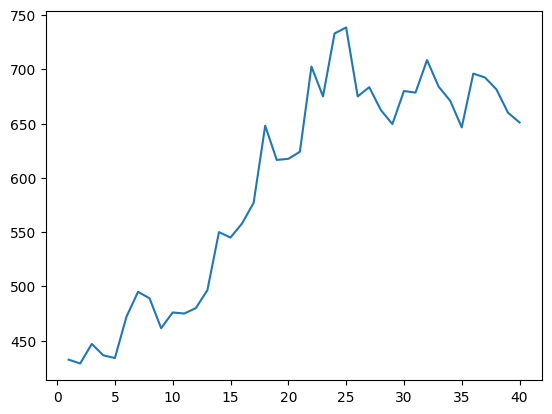

In [38]:
plt.plot(np.array(list(range(1,41))),a['<HIGH>'].array)